# Slice Sampling

Gregory Schuit - 16636910

In [ ]:
%matplotlib notebook

import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
from time import sleep

import matplotlib.animation

In [55]:
W = 0.5

def p_star(x):
    pi = 0.4
    return pi*norm.pdf(x, loc=1, scale=0.6) + (1 - pi)*norm.pdf(x, loc=3, scale=0.7)

def shrink_interval(x_l, x_r, x_prime, x):
    
    if (x_prime > x):
        x_r = x_prime
    else:
        x_l = x_prime
    
    return x_l, x_r

def create_interval(x, mu):
    
    r = np.random.uniform(0, 1)
    x_l = x - r*W
    x_r = x + (1 - r)*W
    
    while (p_star(x_l) > mu):
        x_l -= W
    while (p_star(x_r) > mu):
        x_r += W
        
    return x_l, x_r
        
def slice_sampling(p_star, w, n):
    samples = []
    
    while len(samples) < n:
        x = np.random.uniform(0, 5)

        mu = np.random.uniform(0, p_star(x))
        x_l, x_r = create_interval(x, mu)

        while True:
            x_prime = np.random.uniform(x_l, x_r)
            if p_star(x_prime) > mu:
                samples.append(x_prime)
                break
            else:
                x_l, x_r = shrink_interval(x_l, x_r, x_prime, x)
           
        if not len(samples) % 100:
            print(f'N samples: {len(samples)}', end='\r')
                
    return samples

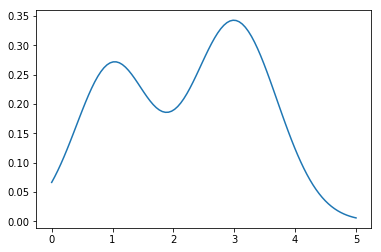

In [56]:
x_linspace = np.linspace(0, 5, 100)
plt.plot(x_linspace, [p_star(x_i) for x_i in x_linspace])
plt.show()

In [57]:
slice_sampling(p_star, W, 4)

[0.7219221458150016,
 1.2680222167021848,
 3.4349975282028504,
 3.0642780644701704]

## Histograma

<IPython.core.display.Javascript object>


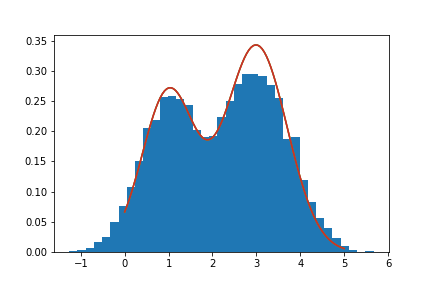

In [75]:
plt.hist(slice_sampling(p_star, W, 10000), bins='auto', density=True)
plt.show()

# Animation

In [166]:
def slice_sampling_animation(p_star, w, axis):
    
    x = np.random.uniform(0, 5)
    axis.scatter(x, p_star(x), color='red')

    mu = np.random.uniform(0, p_star(x))
    x_l, x_r = create_interval(x, mu)
    
    axis.errorbar(x, p_star(x), color='red', xerr=[[x - x_l], [x_r - x]])

#     while True:
#         x_prime = np.random.uniform(x_l, x_r)
#         if p_star(x_prime) > mu:
#             samples.append(x_prime)
#             break
#         else:
#             x_l, x_r = shrink_interval(x_l, x_r, x_prime, x)

<IPython.core.display.Javascript object>


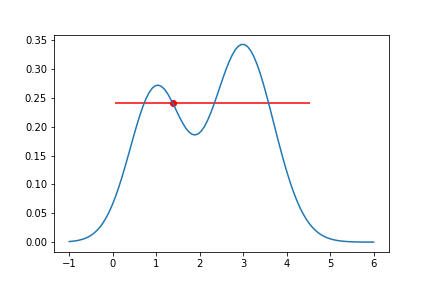

In [167]:
x_linspace = np.linspace(-1, 6, 100)
# plt.plot(x_linspace, [p_star(x_i) for x_i in x_linspace])
# plt.show()

# fig, ax = plt.subplots()
# ax.axis([-1, 6, 0, 0.5])
# l, = ax.plot([],[])
# l, = ax.plot(x_linspace, [p_star(x_i) for x_i in x_linspace])
# l, = plt.scatter(np.random.uniform(0, 5), 0.4, color='red')

fig = plt.figure()
ax = plt.subplot(111)
l, = plt.plot([], [], 'r:',
                    markersize=1.5,
                    alpha=1,
                    animated=True)

def animate(i):
    # Borramos todo
    ax.clear()
    
    # Volvemos a trazar la linea de p_star
    ax.plot(x_linspace, [p_star(x_i) for x_i in x_linspace])
    
    
    slice_sampling_animation(p_star, W, ax)
#     ax.scatter(np.random.uniform(0, 5), 0.4, color='red')
    

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=10, interval=2000)

from IPython.display import HTML
aaaa = HTML(ani.to_jshtml())